# Introduction

In [62]:
import tensorflow as tf

In [63]:
#check for gpu
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [64]:
#imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  
plt.rcParams['figure.figsize']=(12,6)

In [65]:
#loading data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [66]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

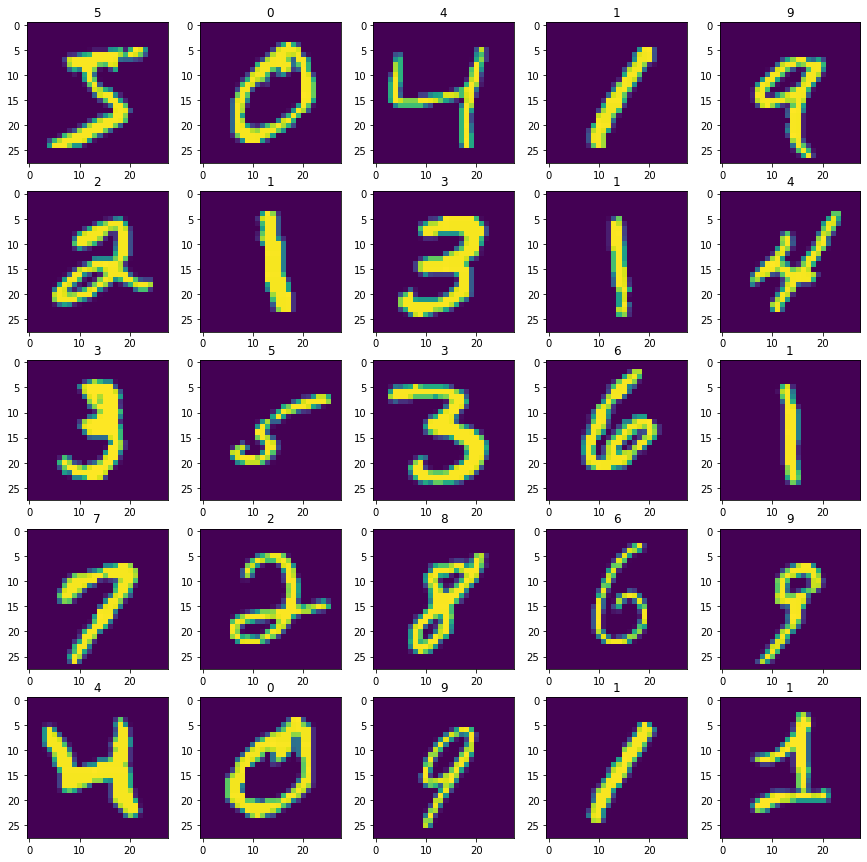

In [67]:
#data samples
plt.figure(figsize=(15,15))
x,y=5,5
for i in range(25):
    plt.subplot(x,y,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.title(y_train[i])



In [68]:
#converting dependent data to categorical
y_train=tensorflow.keras.utils.to_categorical(y_train,10)
y_test=tensorflow.keras.utils.to_categorical(y_test,10)

In [69]:
#reshaping data for model
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

# Modelling

In [70]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,AveragePooling2D,MaxPool2D,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
#model build > [[conv+batch norm]*2 + pooling + [conv+batch norm]*2]+flatten with swish activation function
model=Sequential()

#convolution
model.add(Conv2D(filters=16,kernel_size=3,padding='same',activation='swish',input_shape = (28, 28, 1)))
model.add(BatchNormalization())
#convolution
model.add(Conv2D(filters=32,kernel_size=5,padding='same',activation='swish',strides=2))
model.add(BatchNormalization())

model.add(Dropout(.44))
#pooling
model.add(AveragePooling2D(pool_size=(2,2)))

#convolution
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='swish',strides=1))
model.add(BatchNormalization())
#convolution
model.add(Conv2D(filters=128,kernel_size=5,padding='same',activation='swish',strides=2))
model.add(BatchNormalization())

model.add(Dropout(.44))


#flattening
model.add(Flatten())

model.add(Dense(128,activation='swish'))
model.add(Dropout(.44))
model.add(Dense(10,activation='softmax'))

In [73]:
#early stop for avoid overfit
early_stop=EarlyStopping(patience=5)

In [74]:
#SGD optimizer. adam can be used alternately
opt=tensorflow.keras.optimizers.SGD(learning_rate=0.001,nesterov=True)

In [75]:
#compling model wiht cross entropy loss
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [76]:
#summary of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)         

In [77]:
#fit
model.fit(x_train,y_train,epochs=65,validation_data=(x_test,y_test),callbacks=early_stop)

Epoch 1/65
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7032 - accuracy: 0.7797 - val_loss: 0.1409 - val_accuracy: 0.9567
Epoch 2/65
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2805 - accuracy: 0.9133 - val_loss: 0.0932 - val_accuracy: 0.9695
Epoch 3/65
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2135 - accuracy: 0.9359 - val_loss: 0.0750 - val_accuracy: 0.9759
Epoch 4/65
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1790 - accuracy: 0.9454 - val_loss: 0.0623 - val_accuracy: 0.9797
Epoch 5/65
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1574 - accuracy: 0.9521 - val_loss: 0.0542 - val_accuracy: 0.9819
Epoch 6/65
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1385 - accuracy: 0.9589 - val_loss: 0.0485 - val_accuracy: 0.9840
Epoch 7/65
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1260 - accuracy: 0.9614 - val_loss: 0.0445 - val_ac

In [78]:
score=pd.DataFrame(model.history.history)

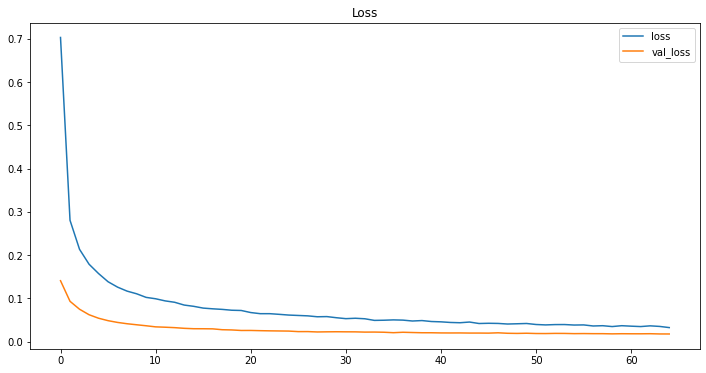

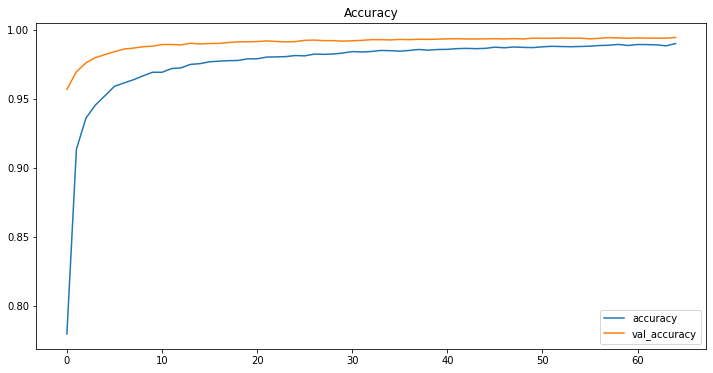

In [79]:
#accuracy and loss plot
score[['loss','val_loss']].plot(title='Loss')
score[['accuracy','val_accuracy']].plot(title='Accuracy');

In [80]:
#predicting x_test
y_pred=np.argmax(model.predict(x_test),axis=1)

In [81]:
#libs for report
from sklearn.metrics import classification_report,confusion_matrix

In [82]:
y_test=np.argmax(y_test,axis=1)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      1.00      1032
           3       0.99      1.00      1.00      1010
           4       1.00      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [84]:
#creating dataframe to see errors
df_results=pd.DataFrame()
df_results['pred']=y_pred
df_results['real']=y_test

In [85]:
df_comp=df_results[df_results['pred']!=df_results['real']]
df_comp.sample(10)

,pred,real
740,9,4
1014,5,6
582,2,8
1522,9,7
1530,7,8
1232,4,9
2597,3,5
445,0,6
2462,0,2
1709,5,9


In [86]:
#number of mispredictions
len(df_comp)

57

In [87]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

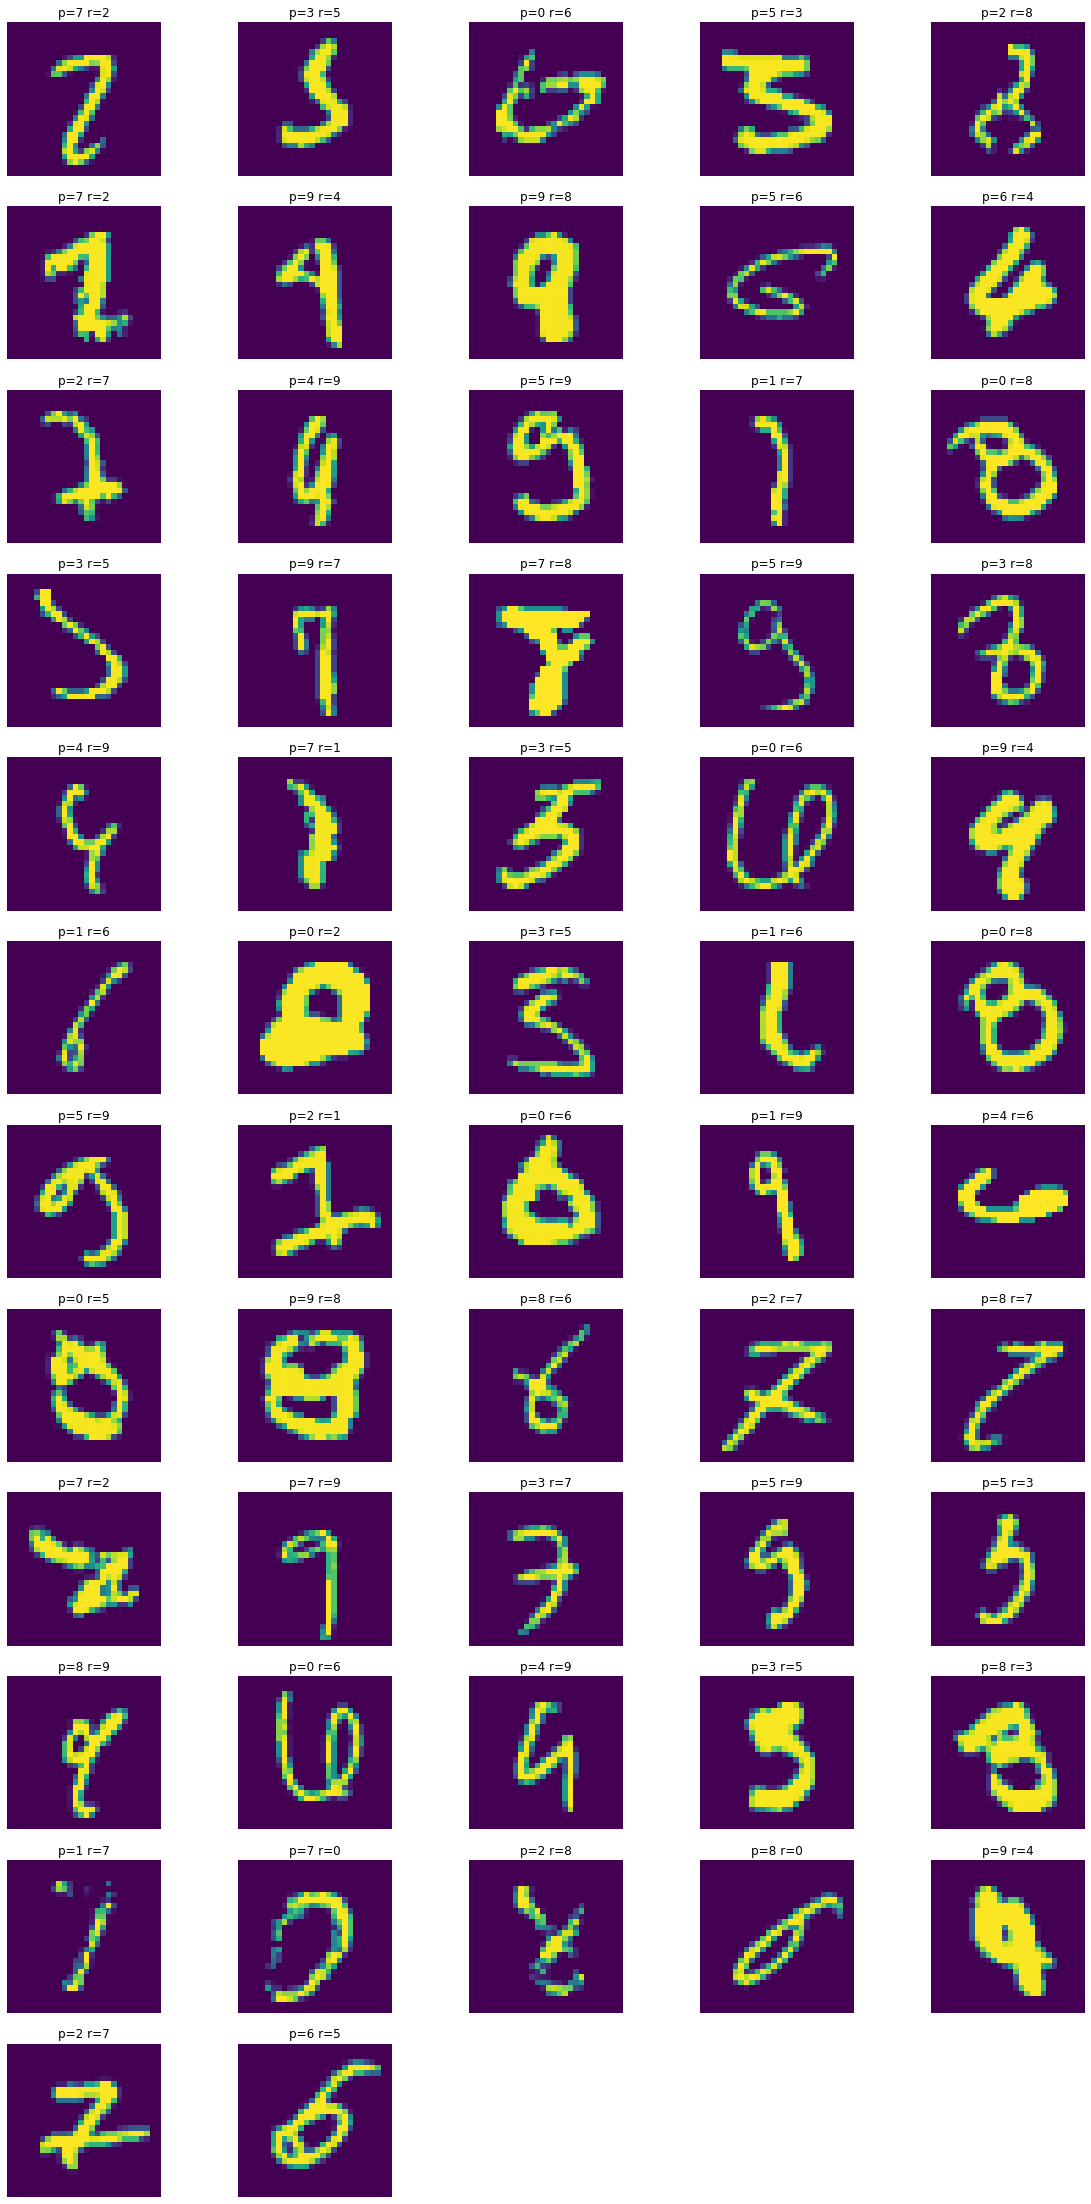

In [88]:
#lets checks how mispredictions looks like
#p=predict
#r=real
plt.figure(figsize=(20,40))
x,y=int(len(df_comp)/5)+1,5
for i in range(len(df_comp.index)):
    plt.subplot(x,y,i+1)
    plt.imshow(x_test[df_comp.index[i]])
    plt.title(f'p={y_pred[df_comp.index[i]]} r={y_test[df_comp.index[i]]}')
    plt.axis('off')
